## Load MJO index

In [2]:
import pandas
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import scipy

In [3]:
mjo_index_file = '/home/rjackson/data/rmm.74toRealtime.txt'

In [4]:
data = pandas.read_csv(mjo_index_file,
                       header=2,
                       delim_whitespace=True)

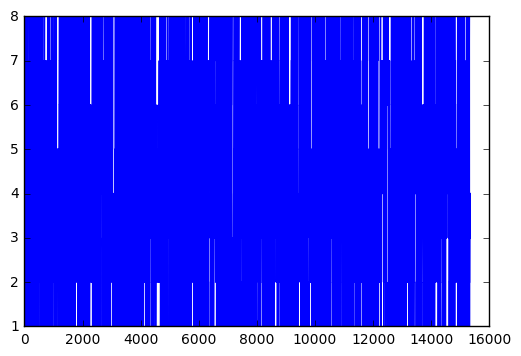

In [5]:
data_matrix = np.ma.array(data.values)
year = data_matrix[:,0]
month = data_matrix[:,1]
day = data_matrix[:,2]
index = data_matrix[:,5]
amplitude = data_matrix[:,6]
index[index > 99].mask = True
plt.plot(index[index < 99])

(0, 5)

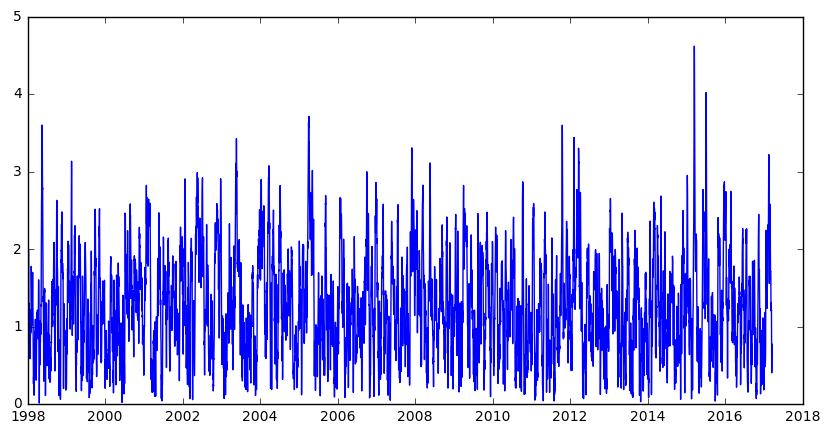

In [6]:
datetimes = [datetime(year[i], month[i], day[i]) for i in range(len(year))]
plt.figure(figsize=(10,5))
plt.plot(datetimes, amplitude)
plt.xlim([datetime(1998,1,1), datetime(2018,1,1)])
plt.ylim([0,5])

In [7]:
year_bins = np.arange(1998, 2017, 1)
ind_hist = np.zeros((len(year_bins), 2))
index[np.logical_and(month > 4, month < 11)] = np.nan
for i in range(len(year_bins)):
    ind_hist[i, 1] = len(np.where(np.logical_and(np.logical_and(index >= 4, index <= 7), 
                                                 year == year_bins[i]))[0])
    ind_hist[i, 0] = len(np.where(np.logical_and(np.logical_or(index <= 3, index == 8), 
                                                 year == year_bins[i]))[0])

(0, 100)

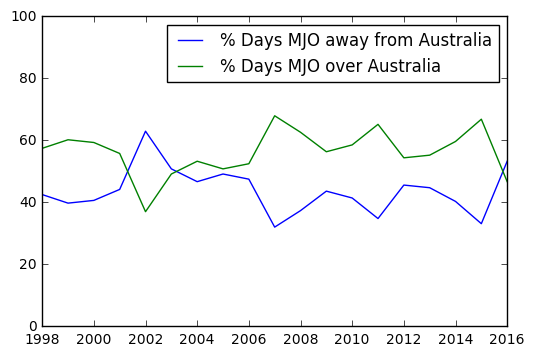

In [10]:
plt.plot(year_bins, ind_hist[:,0]/(ind_hist[:,0]+ind_hist[:,1])*100)
plt.plot(year_bins, ind_hist[:,1]/(ind_hist[:,0]+ind_hist[:,1])*100)
plt.legend(['% Days MJO away from Australia', '% Days MJO over Australia'], loc='best')
plt.ylim([0, 100])

/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-100, 100)

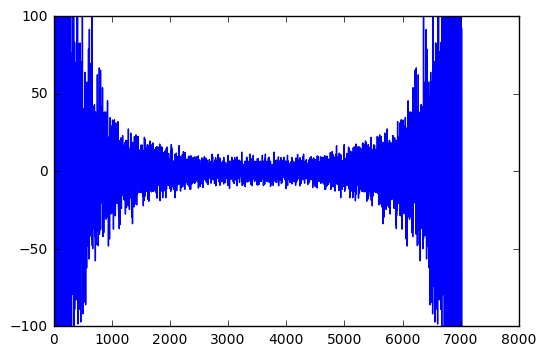

In [9]:
freq = scipy.fft(amplitude[year > 1997])
plt.plot(freq)
plt.ylim([-100, 100])